Author: Roel De Los Santos <br />
Topic: Module 5 Challenge <br />
Date: 8/3/23

# Pymaceuticals Inc.
---
## Purpose: The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

### Top-level Summary Results 
 
 Starting with a reivew of the boxplot chart for Final Tumor Volume, Infubinol appears highest variance of all drugs in the drug regimen study, with a range of 32 to 72. A promising consideration for Capomulin's results when compared to the other drugs. The representation of sex, of male verses female is roughly the same 50.6 vs 49.4. Capolmulin treatment for mouse k409 decrease tumor volume over time. The tumor volume reduced by 48% from 45(mm3) to 22(mm3) over 45 days of treatment.  </br>

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_path = "data/Mouse_metadata.csv"
study_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_df = pd.read_csv(mouse_path)
study_df = pd.read_csv(study_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_df, study_df, how="outer", on='Mouse ID')

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_cnt = df['Mouse ID'].nunique()
print('Number of mice : ', mice_cnt)
print('Number of rows  : ', df.shape[0])
print('Number of columns : ', df.shape[1])

Number of mice :  249
Number of rows  :  1893
Number of columns :  8


In [3]:
# Find duplicates for Mouse ID and Timepoint 
dup_mice = df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)

# Locate all the duplicated mice and return Mouse ID
dup_mice_ID = df.loc[dup_mice, 'Mouse ID'].unique()

# Get all the data for the duplicate mouse ID. 
dup_mice_ID_df = df.loc[df['Mouse ID'] == dup_mice_ID[0]]
# Print the shape
print('Shape of duplicates : ',dup_mice_ID_df.shape)

# Clean duplicates from dataframe
cleaned_df = df.drop(dup_mice_ID_df.index)

# Store cleaned_df as csv in data folder
cleaned_df.to_csv('data/cleaned.csv', index=False, header=True)
print('cleaned.csv is saved in "/data/cleaned.csv"')

Shape of duplicates :  (13, 8)
cleaned.csv is saved in "/data/cleaned.csv"


In [4]:
# Verify the new number of mice in the cleaned_df.
zero_mice = len(cleaned_df['Mouse ID'].unique())
print(f'The starting # of mice was: {mice_cnt} (before removing duplicates)')
print(f'The new # of mice is: {zero_mice} (duplicates removed)')

The starting # of mice was: 249 (before removing duplicates)
The new # of mice is: 248 (duplicates removed)


## Summary Statistics
---

In [5]:
# calculate the following properties of each drug regimen: 
stat_df = cleaned_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
t_mean = stat_df['Tumor Volume (mm3)'].mean()
t_median = stat_df['Tumor Volume (mm3)'].median()
t_stdev = stat_df['Tumor Volume (mm3)'].std()
t_sem = stat_df['Tumor Volume (mm3)'].sem()
# Produce the summary statistics.
summary_df = pd.DataFrame({'Mean': t_mean, 
                           'Median': t_median,
                           'Standard Deviation': t_stdev, 
                           'SEM': t_sem})
# Print the summary statistics
summary_df.head()

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466


## Barplot
---

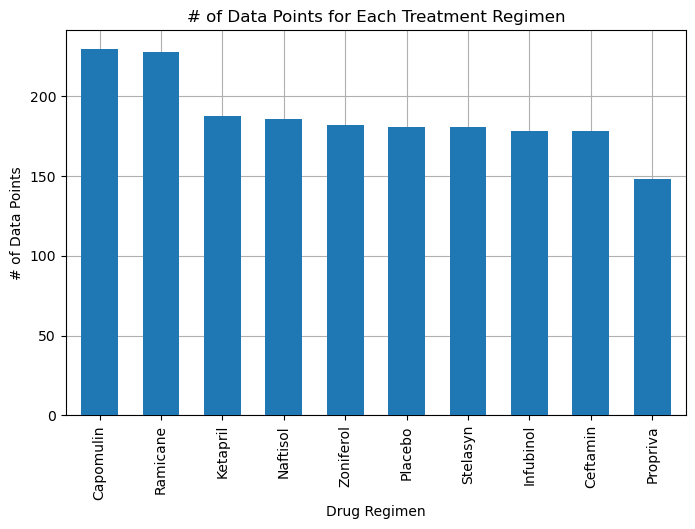

In [6]:
# Use Pandas to create a bar plot total # of datapoints vs # of rows by drug regimen
bar = cleaned_df['Drug Regimen'].value_counts().plot.bar(width=0.6, figsize=(8, 5), zorder=3)

# Set axe labels
bar.set_ylabel("# of Data Points")
bar.set_xlabel("Drug Regimen")
bar.set_title("# of Data Points for Each Treatment Regimen")

# create a grid 
bar.grid(zorder=0)

### Alternative Barplot using Matplotlib
---

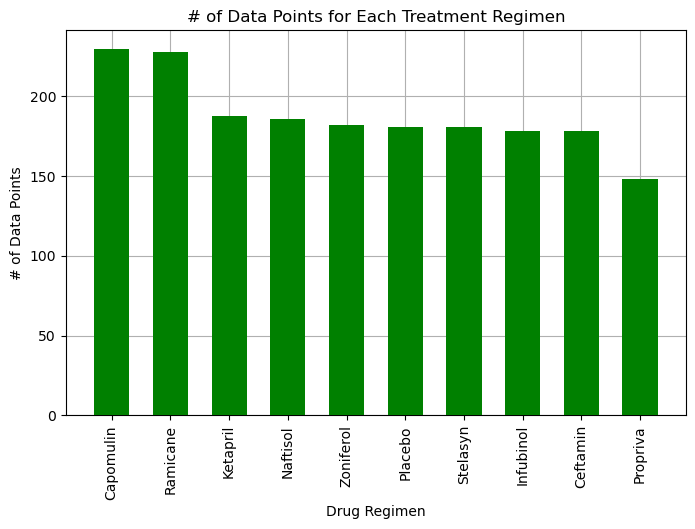

In [7]:
# Get drug regimen x and y counts
y_axis = cleaned_df['Drug Regimen'].value_counts()
x_axis = np.arange(len(y_axis))

# Plot and rotate
plt.figure(figsize=(8,5))
plt.bar(x_axis,y_axis, width = 0.6, zorder=3, color= 'green')
plt.xticks(rotation=90)
tick = [value for value in x_axis]
plt.xticks(tick, y_axis.index.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Data Points')
plt.title('# of Data Points for Each Treatment Regimen')
plt.grid(zorder=0)
plt.show()

## Pie Chart 
---

(-1.25, 1.25, -1.25, 1.25)

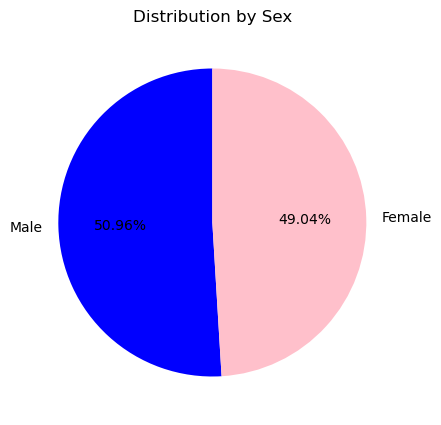

In [8]:
# Create pie chart using pandas
pie = cleaned_df['Sex'].value_counts()
piePlot = pie.plot.pie(autopct='%.2f%%', colors=['blue', 'pink'], figsize=(8, 5), startangle=90, title='Distribution by Sex')
plt.axis('off')

## Alternative Pie Chart Method using Matplotlib
---

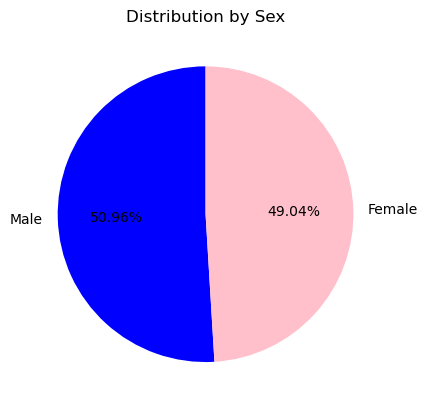

In [9]:
# Using the same pie variable of the value counts by sex
# set colors
colors = ['blue','pink']
# create a pie chart thats filled with corresponding percentages and displayed vertically use matplotlib
plt.pie(pie, labels=pie.index.values,colors=colors, autopct='%.2f%%', startangle=90)
plt.title('Distribution by Sex') 
plt.show()

## Quartiles and Outliers
---

In [10]:
# Get the max timepoint by Mouse ID, sort, reset index and rename columns
max_time_df = pd.DataFrame(cleaned_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})

# Merge max timepoint
merged_df = pd.merge(cleaned_df, max_time_df, on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [13]:
# Create a list by regimen to loop
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
t_list = []

# Calculate the Interquartile Range and outliers
for drug in regimen:
    t_vol = merged_df.loc[merged_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    # add subset to tumor_vol_list 
    t_list.append(t_vol)

    # Calculate the IQR and quantitatively
    quartiles = t_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = t_vol.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = t_vol.loc[(t_vol < lower_bound) 
                  | (t_vol > upper_bound)]

     # Print out the result
    print(f'{drug} Regimen')
    print(f'Average tumor volume(mm3) for {drug} is: {round(mean,1)}')
    print(f'The final tumor volume(mm3) for {drug} above {round(upper_bound,1)} are outliers.')
    print(f'The final tumor volume(mm3) for {drug} below {round(lower_bound,1)} are outliers.')
    print(f'Number of outliers for {drug} is: {outliers.count()}')
    if outliers.count() > 0:
        for i in outliers.index:
            print(f'Outlier final tumor volume(mm3) is {round(outliers[i], 1)}')
    print('----------------------------------------------------------')

Capomulin Regimen
Average tumor volume(mm3) for Capomulin is: 40.7
The final tumor volume(mm3) for Capomulin above 56.0 are outliers.
The final tumor volume(mm3) for Capomulin below 26.7 are outliers.
Number of outliers for Capomulin is: 2
Outlier final tumor volume(mm3) is 25.5
Outlier final tumor volume(mm3) is 23.3
----------------------------------------------------------
Ramicane Regimen
Average tumor volume(mm3) for Ramicane is: 40.2
The final tumor volume(mm3) for Ramicane above 57.5 are outliers.
The final tumor volume(mm3) for Ramicane below 24.2 are outliers.
Number of outliers for Ramicane is: 1
Outlier final tumor volume(mm3) is 22.1
----------------------------------------------------------
Infubinol Regimen
Average tumor volume(mm3) for Infubinol is: 52.9
The final tumor volume(mm3) for Infubinol above 72.3 are outliers.
The final tumor volume(mm3) for Infubinol below 32.3 are outliers.
Number of outliers for Infubinol is: 0
-----------------------------------------------

## Boxplot
---

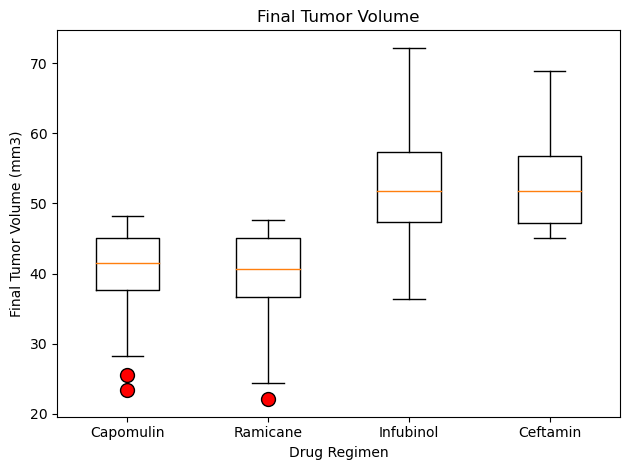

In [15]:
# Create Tumor Volume Box Plot of each mouse by regimen
fig1, t_boxplot = plt.subplots()

t_boxplot.boxplot(t_list, labels= regimen, flierprops={'markerfacecolor':'r','markersize': 10})
t_boxplot.set_title('Final Tumor Volume')
t_boxplot.set_xlabel('Drug Regimen')
t_boxplot.set_ylabel('Final Tumor Volume (mm3)')
plt.tight_layout()
plt.show()

# Save box plot graph to Images folder
t_boxplot.figure.savefig('t_boxplot.png')


## Scatterplot and Lineplots
---

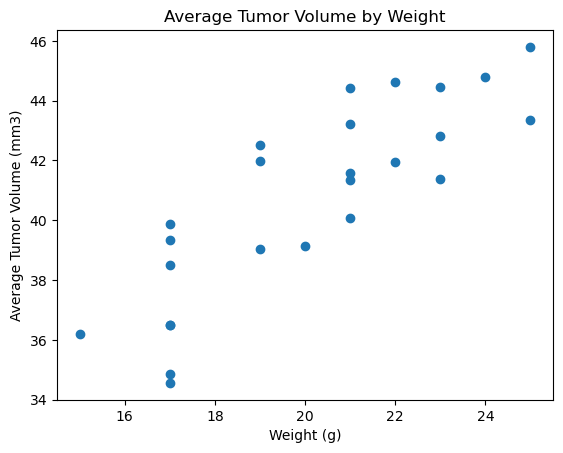

In [16]:
# Get Capomulin regimen
cap_df = df.loc[df['Drug Regimen'] == 'Capomulin']
avgvol_df = pd.DataFrame(cap_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Avg_Tumor_Volume'})

# Merge average tumor volume onto df
avgvol_df = pd.merge(cap_df, avgvol_df, on='Mouse ID')
f_vol_df = avgvol_df[['Weight (g)', 'Avg_Tumor_Volume']].drop_duplicates()
f_vol_df

x = f_vol_df['Weight (g)']
y = f_vol_df['Avg_Tumor_Volume']

# Create a scatter plot based on scatter
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display 
plt.show()

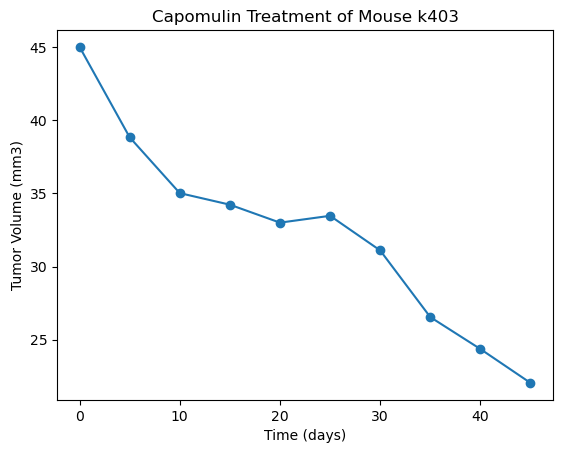

In [17]:
# Get mouse k403 
mouse = df.loc[df['Mouse ID'] == 'k403']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')

# Add labels 
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse k403")

# Display 
plt.show()

## Scatter plot with R-Squared Value
---

Mouse weight and tumor vol is 0.8 correlated
The r-squared is: 0.71


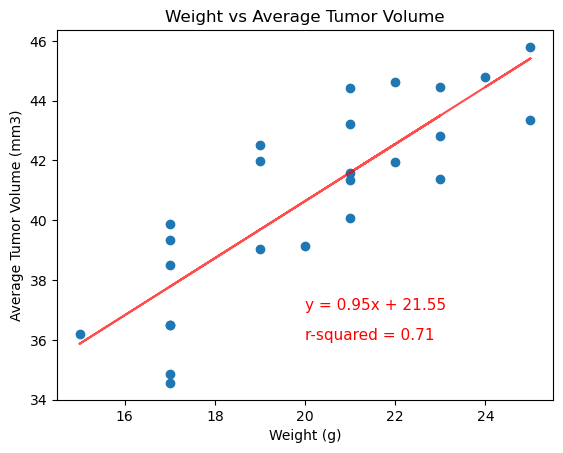

In [18]:
# Calculate the correlation
correlation = round(st.pearsonr(x, y)[0],1)
print(f"Mouse weight and tumor vol is {correlation} correlated")

# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)

# Calculate r-squared
r_sq = round(rvalue**2,2)
print(f"The r-squared is: {r_sq}")

# y = mx + b
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(x,y)
plt.plot(x,regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(line_eq,(20,37), fontsize=11, color="red")
plt.annotate(f'r-squared = {r_sq}', (20,36), fontsize=11, color="red")

# Define title and x/y labels
plt.title('Weight vs Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Save box plot graph to Images folder
plt.savefig('scatterplot_weight_vs_vol.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()